# EXERCIZE 04 - Cloning quasars

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey (SDSS).

The SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)


## IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from astroML.datasets import fetch_dr7_quasar

In [2]:
# ACCESSING DATA

# Fetch the quasar data
data = fetch_dr7_quasar()

# Select the first N points
N = 100000
data = data[:N]

z = data['redshift']

# L04:

## Tasks

- Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

(Hint: It shouldn't. But why?)

# 1 - REJECTION SAMPLING

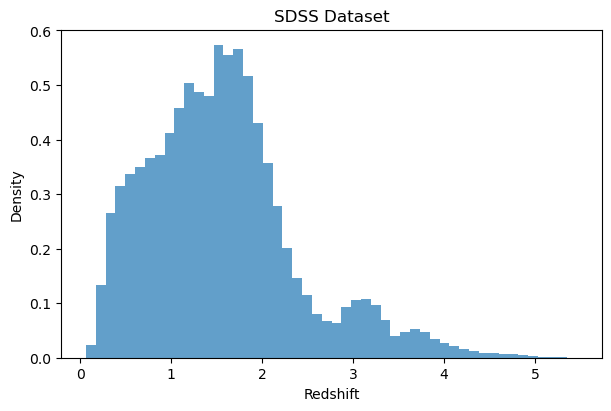

In [3]:
# PLOTTING DATA

fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

nbin = 50
bins, edge, patch = ax.hist(z, nbin, density=True, alpha=0.7)

ax.set_xlabel("Redshift")
ax.set_ylabel("Density")
ax.set_title("SDSS Dataset");

In [4]:
rng = np.random.default_rng()

In [5]:
# REJECTION SAMPLING

N = int(10000 / bins.size)

ymax = bins.max()

x_scatter, x = [], []
y_scatter, y = [], []
for i in range(edge.size - 1):
    x_random = rng.uniform(edge[i], edge[i+1], N)
    y_random = rng.uniform(0, ymax, N)
    
    x_scatter.extend(x_random)
    y_scatter.extend(y_random)

    mask = y_random < bins[i]
    x.extend(x_random[mask])
    y.extend(y_random[mask])

x = np.array(x)
y = np.array(y)

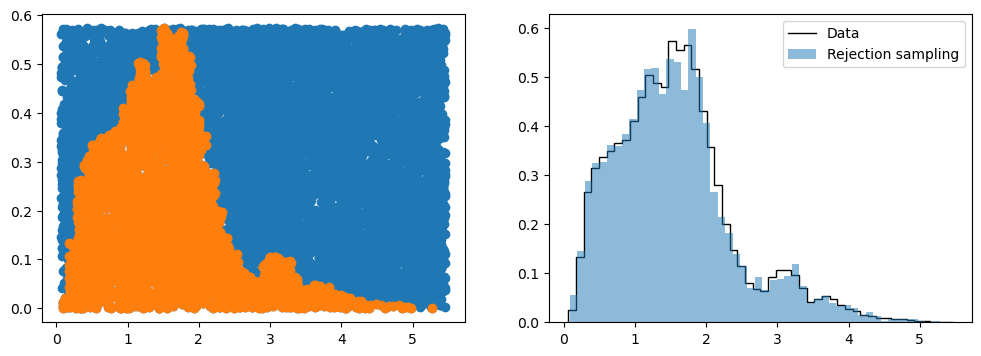

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(x_scatter, y_scatter)
axs[0].scatter(x, y)

axs[1].stairs(bins, edge, color='k', label='Data')
h1 = axs[1].hist(x, nbin, density=True, alpha=.5, label='Rejection sampling')
axs[1].legend();

# 2 - INVERSE FUNCTION

In [7]:
cdf = np.insert(np.cumsum(bins) / bins.sum(), 0, 0)

n = 100000

u = rng.uniform(size=n)

x = np.zeros(n)
for i in range(cdf.size - 1):
    mask = (cdf[i] < u) & (u < cdf[i+1])
    x[mask] = rng.uniform(edge[i], edge[i+1], x[mask].size)

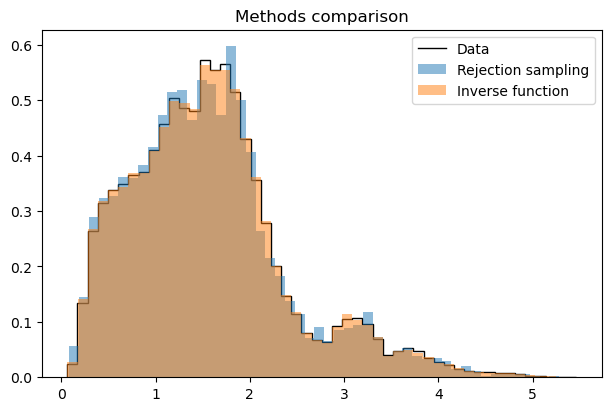

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

ax.stairs(bins, edge, color='k', label='Data')
ax.stairs(h1[0], h1[1], fill=True, alpha=.5, label='Rejection sampling')
ax.hist(x, nbin, density=True, alpha=.5, label='Inverse function')

ax.set_title('Methods comparison')
ax.legend();